
Test Accuracy:
Decision Tree: 0.57
KNN: 0.56
Logistic Regression: 0.56


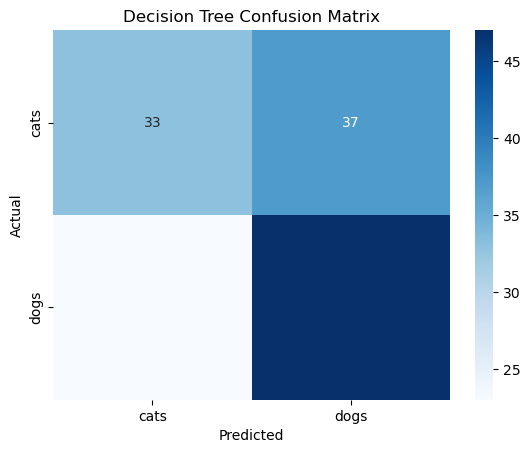

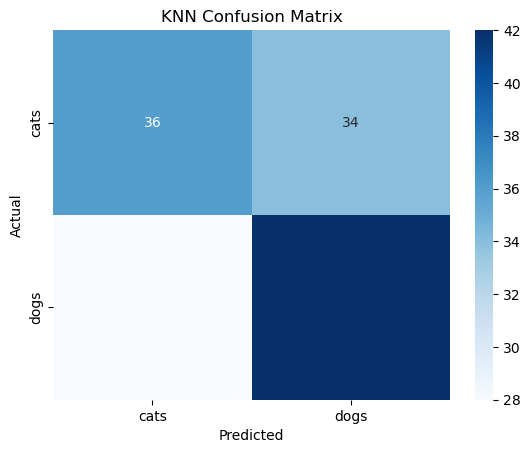

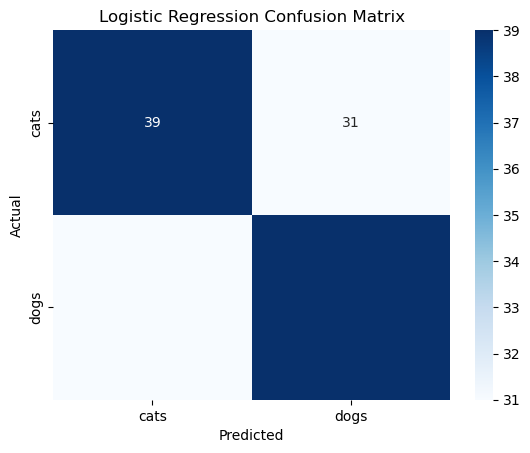


Classification Report for Decision Tree:
              precision    recall  f1-score   support

        cats       0.59      0.47      0.52        70
        dogs       0.56      0.67      0.61        70

    accuracy                           0.57       140
   macro avg       0.57      0.57      0.57       140
weighted avg       0.57      0.57      0.57       140


Classification Report for KNN:
              precision    recall  f1-score   support

        cats       0.56      0.51      0.54        70
        dogs       0.55      0.60      0.58        70

    accuracy                           0.56       140
   macro avg       0.56      0.56      0.56       140
weighted avg       0.56      0.56      0.56       140


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

        cats       0.56      0.56      0.56        70
        dogs       0.56      0.56      0.56        70

    accuracy                           0.56       140
   mac

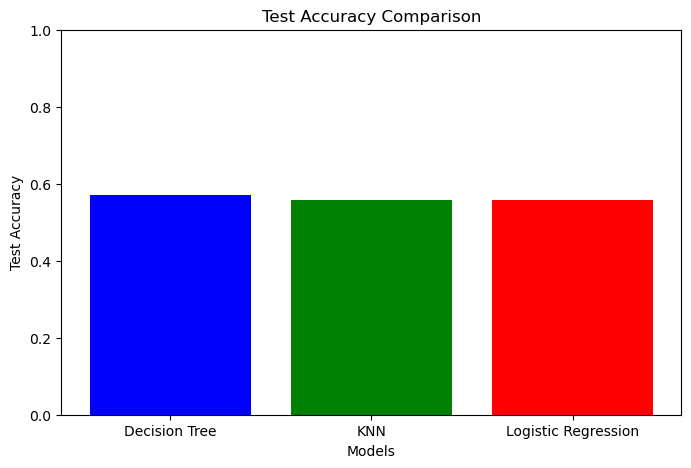

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Define paths for training and testing datasets
train_path = './CatDog_dataset/CatDog_dataset/train'
test_path = './CatDog_dataset/CatDog_dataset/test'

# Function to load and preprocess images
def load_images(folder_path, size=(100, 100)):
    images = []
    labels = []
    for label in os.listdir(folder_path):
        class_path = os.path.join(folder_path, label)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            img = Image.open(img_path).convert('RGB')
            img = img.resize(size)  # Resize image to 100x100 pixels
            img_array = np.array(img).flatten()  # Flatten the image into a 1D array
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load training and testing images
train_images, train_labels = load_images(train_path)
test_images, test_labels = load_images(test_path)

# Encode labels ('cat' and 'dog') as integers
le = LabelEncoder()
train_labels_encoded = le.fit_transform(train_labels)
test_labels_encoded = le.transform(test_labels)

# Initialize machine learning models
decision_tree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
logistic_regression = LogisticRegression(max_iter=1000)

# Train the models using the entire training set
decision_tree.fit(train_images, train_labels_encoded)
knn.fit(train_images, train_labels_encoded)
logistic_regression.fit(train_images, train_labels_encoded)

# Make predictions on the test set
test_preds_tree = decision_tree.predict(test_images)
test_preds_knn = knn.predict(test_images)
test_preds_logreg = logistic_regression.predict(test_images)

# Print test accuracy for each model
print("\nTest Accuracy:")
print(f"Decision Tree: {accuracy_score(test_labels_encoded, test_preds_tree):.2f}")
print(f"KNN: {accuracy_score(test_labels_encoded, test_preds_knn):.2f}")
print(f"Logistic Regression: {accuracy_score(test_labels_encoded, test_preds_logreg):.2f}")

# Function to plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(test_labels_encoded, test_preds_tree, 'Decision Tree Confusion Matrix')
plot_confusion_matrix(test_labels_encoded, test_preds_knn, 'KNN Confusion Matrix')
plot_confusion_matrix(test_labels_encoded, test_preds_logreg, 'Logistic Regression Confusion Matrix')

# Print classification reports for each model
print("\nClassification Report for Decision Tree:")
print(classification_report(test_labels_encoded, test_preds_tree, target_names=le.classes_))

print("\nClassification Report for KNN:")
print(classification_report(test_labels_encoded, test_preds_knn, target_names=le.classes_))

print("\nClassification Report for Logistic Regression:")
print(classification_report(test_labels_encoded, test_preds_logreg, target_names=le.classes_))

# Plot test accuracy comparison for all models
models = ['Decision Tree', 'KNN', 'Logistic Regression']
test_accuracies = [accuracy_score(test_labels_encoded, test_preds_tree),
                   accuracy_score(test_labels_encoded, test_preds_knn),
                   accuracy_score(test_labels_encoded, test_preds_logreg)]

plt.figure(figsize=(8, 5))
plt.bar(models, test_accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

c:\Users\hp\anaconda3\envs\env\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hp\anaconda3\envs\env\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hp\anaconda3\envs\env\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


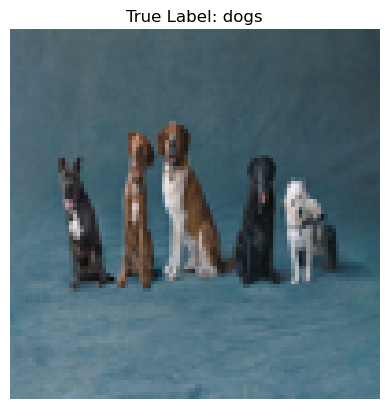

Decision Tree Prediction: cats
KNN Prediction: cats
Logistic Regression Prediction: dogs


In [27]:
import random

def show_random_test_prediction():
    random_index = random.randint(0, len(test_images) - 1)
    
    random_image = test_images[random_index].reshape(100, 100, 3)
    true_label = test_labels[random_index]
    pred_tree = le.inverse_transform([decision_tree.predict([test_images[random_index]])])[0]
    pred_knn = le.inverse_transform([knn.predict([test_images[random_index]])])[0]
    pred_logreg = le.inverse_transform([logistic_regression.predict([test_images[random_index]])])[0]

    plt.imshow(random_image.astype(np.uint8))
    plt.axis('off')
    plt.title(f"True Label: {true_label}")
    plt.show()
    
    print(f"Decision Tree Prediction: {pred_tree}")
    print(f"KNN Prediction: {pred_knn}")
    print(f"Logistic Regression Prediction: {pred_logreg}")

show_random_test_prediction()